In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from MyModules import *

Welcome to JupyROOT 6.24/06


In [15]:
plt.rcParams["figure.figsize"] = [12, 8]

In [18]:
x_train, y_train, input_nfeatures, target_nfeatures = data_generation(
    n_data=10000,
    data_range=[10,30],
    target_function=lambda a: np.sum(a, axis=1)
)

In [19]:
model = MyModule(
    input_nfeatures=input_nfeatures,
    target_nfeatures=target_nfeatures,
    hidden1=50, hidden2=30)

In [20]:
model_1 = nn.Linear(input_nfeatures, target_nfeatures, bias=False)

0 4493841268736.0 [0.1]
10 123092983808.0 [0.09000000000000001]
20 323493134336.0 [0.08100000000000002]
30 109430882304.0 [0.07290000000000002]
40 81925488640.0 [0.06561000000000002]
50 78144987136.0 [0.05904900000000002]
60 67372912640.0 [0.05314410000000002]
70 68749508608.0 [0.04782969000000002]
80 67198095360.0 [0.043046721000000024]
90 67215613952.0 [0.03874204890000002]


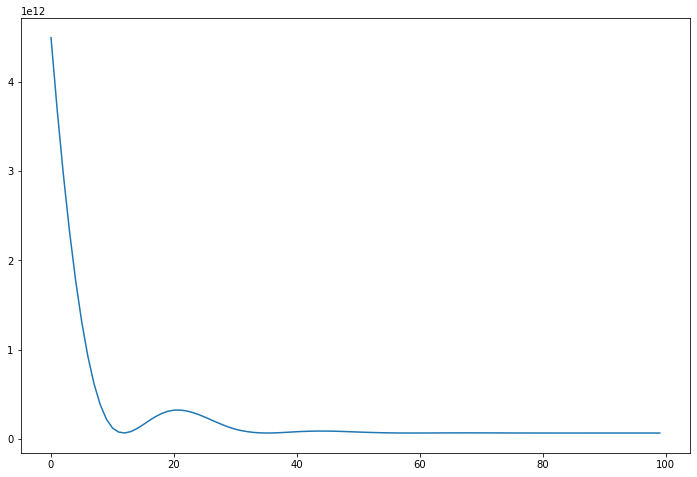

In [21]:
learn(model=model_1,
      x_train=x_train,
      y_train=y_train,
      n_epoch=100,
      learning_rate=1e-1,
      scheduler=True)

In [22]:
with torch.no_grad():
    model_1.eval()
    y_train_pred = model_1(x_train)

In [23]:
for name, param in model_1.named_parameters():
    if param.requires_grad:
        print (name, param.data)

weight tensor([[1.0023, 0.8225, 1.2295, 0.8183, 0.9604, 0.8177, 1.2505, 0.9535, 0.9244,
         1.1064]])


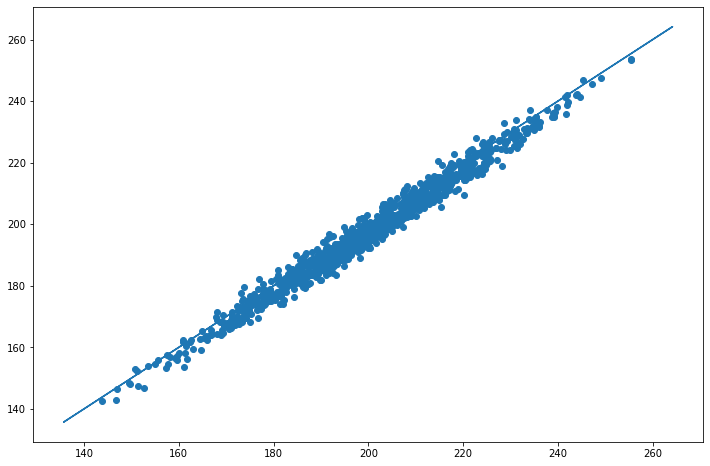

In [24]:
plt.scatter(y_train[:1000], y_train_pred[:1000])
plt.plot(y_train, y_train)
plt.show()

## lets set the weights manually and see...

In [25]:
for param in model_1.parameters():
    param.data.fill_(1.)

In [26]:
with torch.no_grad():
    model_1.eval()
    y_train_pred = model_1(x_train)

In [27]:
for name, param in model_1.named_parameters():
    if param.requires_grad:
        print (name, param.data)

weight tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


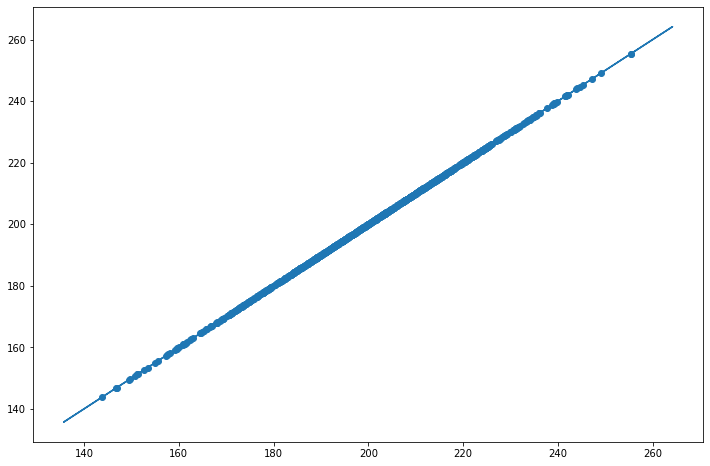

In [28]:
plt.scatter(y_train[:1000], y_train_pred[:1000])
plt.plot(y_train, y_train)
plt.show()